## 1 Visualizing Geographic Data


### 1.1 Geographic Data



From **scientific fields** like **meteorology** and **climatology**, through to the software on our smartphones like **Google Maps** and **Facebook** check-ins, geographic data is always present in our everyday lives. Raw geographic data like **latitudes** and **longitudes** are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.

In this section, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](http://openflights.org/data.html). Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

- **airlines.csv** - data on each airline.
    - **country** - where the airline is headquartered.
    - **active** - if the airline is still active.
- **airports.csv** - data on each airport.
    - **name** - name of the airport.
    - **city** - the airport is located.
    - **country** - country the airport is located.
    - **code** - unique airport code.
    - **latitude** - latitude value.
    - **longitude** - longitude value.
- **routes.csv** - data on each flight route.
    - **airline** - airline for the route.
    - **source** - starting city for the route.
    - **dest** - destination city for the route.

We can explore a range of interesting questions and ideas using these datasets:

- For each airport, which destination airport is the most common?

- Which cities are the most important hubs for airports and airlines?

Before diving into coordinate systems, explore the datasets in the code cell below.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Read in the 3 CSV files into 3 separate dataframe objects - **airlines**, **airports**, and **routes**.
- Use the **DataFrame.iloc[]** method to return the first row in each dataframe as a neat table.
- Display the first rows for all dataframes using the print() function. Try to answer the following questions:
  - What's the best way to link the data from these 3 different datasets together?
  - What are the formats of the latitude and longitude values?

In [0]:
# put your code here
import pandas as pd

In [0]:
airlines = pd.read_csv('https://raw.githubusercontent.com/ivanovitchm/datascience_one_2019_1/master/Lesson%2312/airlines.csv')
airports = pd.read_csv('https://github.com/ivanovitchm/datascience_one_2019_1/raw/master/Lesson%2312/airports.csv?raw=true')
routes   = pd.read_csv('https://github.com/ivanovitchm/datascience_one_2019_1/blob/master/Lesson%2312/routes.csv?raw=true')

In [0]:
first_row_airlines = airlines.iloc[0,:]
first_row_airports = airports.iloc[0,:]
first_row_routes   = routes.iloc[0,:]

In [0]:
first_row_airlines

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object

In [0]:
first_row_airports

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object

In [0]:
first_row_routes

airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object

In [0]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
id           8107 non-null int64
name         8107 non-null object
city         8107 non-null object
country      8107 non-null object
code         5880 non-null object
icao         8043 non-null object
latitude     8107 non-null float64
longitude    8107 non-null float64
altitude     8107 non-null int64
offset       8107 non-null float64
dst          8107 non-null object
timezone     8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


### Answer
As *routes* table has a entry for *airlines* (`airline_id`), besides entries for *airport* table (`source_id`, `dest_id`. Therefore, we can use it as a intermediate table to link the databases.

The latitude and longitude are saved at *airports* table as float numbers.

### 1.2 Geographic coordinate systems



A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0RVJ6c1U2Rl8wdWM">

| Name                              | City          | State | Latitude  | Longitude   |
|-----------------------------------|---------------|-------|-----------|-------------|
| White House                       | Washington    | DC    | 38.898166 | -77.036441  |
| Alcatraz Island                   | San Francisco | CA    | 37.827122 | -122.422934 |
| Instituto Metrópole Digital       | Natal         | RN    | -5.831997 | -35.205415  |

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). We'll use the [Mercator](https://en.wikipedia.org/wiki/Mercator_projection) projection, because it is commonly used by popular mapping software.

### 1.3  Installing Basemap



Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the [basemap toolkit](http://matplotlib.org/basemap/). Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The [documentation for basemap](http://matplotlib.org/basemap/users/intro.html) provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections.
Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. Before we dive into how basemap works, let's get familiar with how to install it.

The easiest way to install basemap is through Anaconda. 

```python
conda install -c conda-forge basemap
```

The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:

```python
from mpl_toolkits.basemap import Basemap
```

Because basemap uses matplotlib, you'll want to import **matplotlib.pyplot** into your environment when you use Basemap.

In [0]:
# install dependencies
!pip install matplotlib==2.2.4
!sudo apt install proj-bin libproj-dev libgeos-dev
!pip install pyproj==1.9.5.1 pyshp==1.2.12
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
     | 165.5MB 11.0MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-yyvimy6h/wheels/6c/c2/bd/d6fb8f2660e0591d357352aba1b117b3211d016994d933d792
Successfully built basemap


In [0]:
from mpl_toolkits.basemap import Basemap

### 1.4  Workflow with basemap



Here's what the general workflow will look like when working with two-dimensional maps:

- Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
- Convert spherical coordinates to Cartesian coordinates using the basemap instance.
- Use the matplotlib and basemap methods to customize the map.
- Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the [basemap constructor](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap) and pass in values for the required parameters:

- **projection**: the map projection.
- **llcrnrlat**: latitude of lower left hand corner of the desired map domain
- **urcrnrlat**: latitude of upper right hand corner of the desired map domain
- **llcrnrlon**: longitude of lower left hand corner of the desired map domain
- **urcrnrlon**: longitude of upper right hand corner of the desired map domain

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Create a new basemap instance with the following parameters:
  - **projection**: "merc"
  - **llcrnrlat**: -80 degrees
  - **urcrnrlat**: 80 degrees
  - **llcrnrlon**: -180 degrees
  - **urcrnrlon**: 180 degrees
2. Assign the instance to the new variable **m**.

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# put your code here
m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80.0, llcrnrlon=-180, urcrnrlon=180)

### 1.5  Converting From Spherical to Cartesian Coordinates



As we mentioned before, we need to convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map. We can pass in a list of latitude and longitude values into the basemap instance and it will return back converted lists of longitude and latitude values using the projection we specified earlier. The constructor only accepts list values, so we'll need to use [Series.tolist()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tolist.html) to convert the **longitude** and **latitude** columns from the **airports** dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

```python
x, y = m(longitudes, latitudes)
```

The basemap object will return 2 list objects, which we assign to **x** and **y**. Finally, we display the first 5 elements of the original longitude values, original latitude values, the converted longitude values, and the converted latitude values.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Convert the longitude values from spherical to Cartesian and assign the resulting list to **x**.
2. Convert the latitude values from spherical to Cartesian and assign the resulting list to **y**.

In [0]:
# put your code here
x, y = m(airports.longitude.tolist(), airports.latitude.tolist())

In [0]:
x[:5]

[36181909.30105094,
 36226033.53986971,
 36060037.49493744,
 36330283.404696316,
 36385192.32317709]

### 1.6  Generating a scatter plot




Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of **x** and **y** coordinates, we use the [basemap.scatter()](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter) method.

```python
m.scatter(x,y)
```

The **basemap.scatter()** method has similar parameters to the [pyplot.scatter()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). For example, we can customize the size of each marker using the **s** parameter:

```python
# Large markers.
m.scatter(x,y,s=10)
# Smaller markers.
m.scatter(x,y,s=5)
```

After we've created the scatter plot, use **plt.show()** to display the plot. We'll dive more into customizing the plot in the next step but now, create a simple scatter plot.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Create a scatter plot using the converted latitude and longitude values using a marker size of **1**.
2. Display the scatter plot.

In [0]:

# put your code here
import matplotlib.pyplot as plt

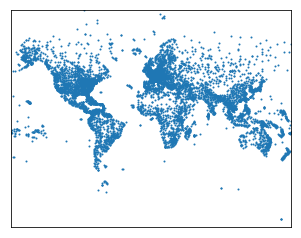

In [0]:
m.scatter(x,y,s=1)
plt.show()

### 1.7  Customizing The Plot Using Basemap



You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the *basemap.drawcoastlines(color='color_name')* method. Other customization is fill the continents and inlad lakes using some background color *basemap.fillcontinents(color='color_name', lake_color='color_name')*. 
Draw the boundaries of each country is another best practice. *basemap.drawcountries(color='color_name')*


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



1. Use *basemap.drawcoastlines()*, *basemap.fillcontinents()* and *basemap.drawcountries()* to customize your map. Tip: fillcontinents() has support to **alpha** property which sets alpha transparency for continent polygons.
2. Display the plot using **plt.show()**.


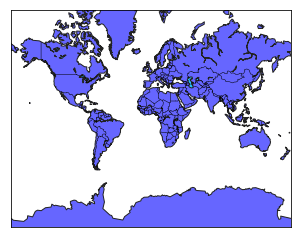

In [0]:
# put your code here
m.drawcoastlines(color='#222222')
m.fillcontinents(color='blue', lake_color='cyan', alpha=0.6)
m.drawcountries(color='black')

plt.show()

### 1.8  Customizing The Plot Using Matplotlib

We can add code that:

- uses **pyplot.subplots()** to specify the **figsize** parameter
- returns the Figure and Axes object for a single subplot and assigns to **fig** and **ax** respectively
- use the **Axes.set_title()** method to set the map title

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Before creating the basemap instance and generating the scatter plot, add code that:
    - creates a figure with a height of 15 inches and a width of 20 inches
    - sets the title of the scatter plot to **"Scaled Up Earth With Coastlines"**


Text(0.5,1,'Scaled Up Earth With Coastlines')

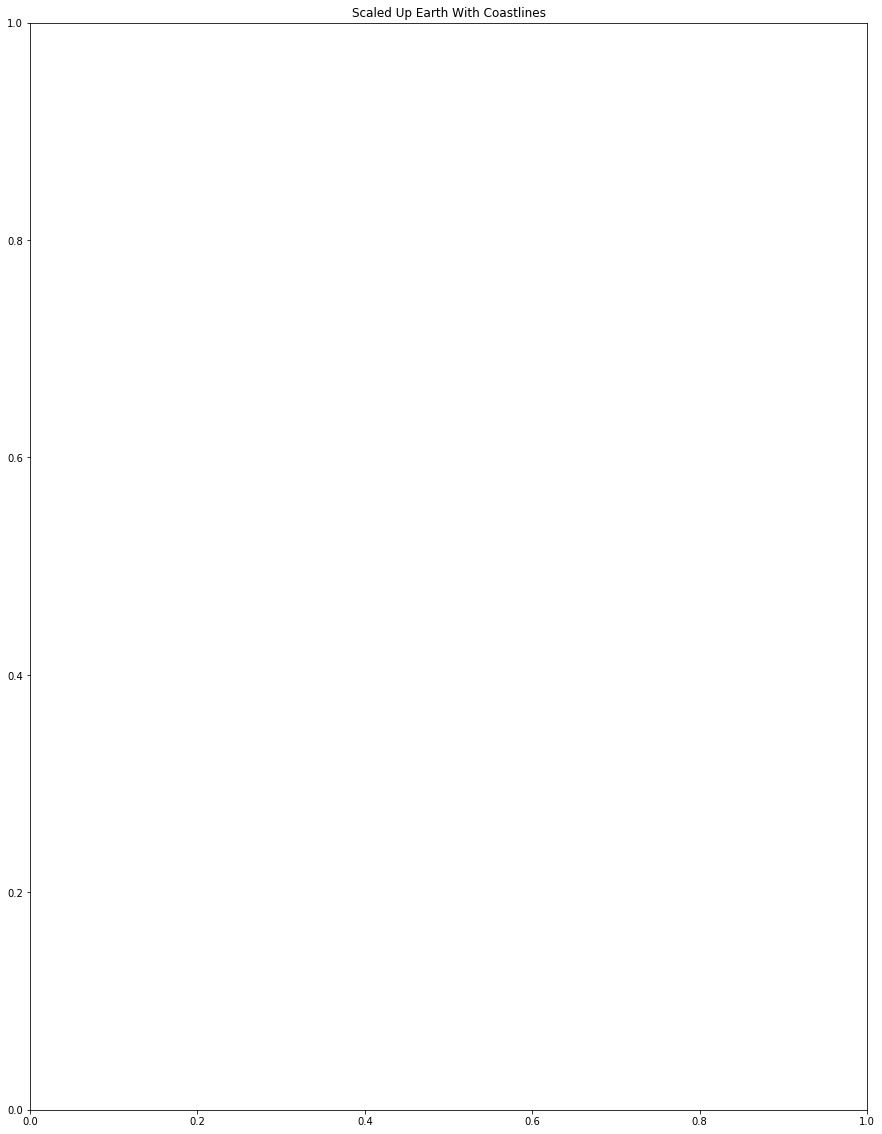

In [0]:
# put your code here
fig, ax = plt.subplots(figsize=(15,20))

ax.set_title('Scaled Up Earth With Coastlines')


### 1.9  Introduction to Great Circles



To better understand the flight routes, we can draw **great circles** to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0blFtbmNLRlpWVkE">

<img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0bW9fOHBDam9DdTA">

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight **routes** from the routes dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. While the **routes** dataframe contains the source and destination airports for each route, the latitude and longitude values for each airport are in a separate dataframe (**airports**).

To make things easier, we've created a new CSV file called **geo_routes.csv** that contains the latitude and longitude values corresponding to the source and destination airports for each route. We've also removed some columns we won't be working with.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


1. Read **geo_routes.csv** into a dataframe named **geo_routes**.
2. Use the **DataFrame.info()** method to look for columns containing any null values.
3. Display the first five rows in **geo_routes**.

In [0]:
# put your code here
geo_routes = pd.read_csv('https://github.com/ivanovitchm/datascience_one_2019_1/blob/master/Lesson%2312/geo_routes.csv?raw=true')

In [0]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [0]:
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


### 1.10  Displaying Great Circles



We use the **basemap.drawgreatcircle()** method to display a great circle between 2 points. The **basemap.drawgreatcircle()** method requires four parameters in the following order:

- **lon1** - longitude of the starting point.
- **lat1** - latitude of the starting point.
- **lon2** - longitude of the ending point.
- **lat2** - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:

```python
m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
```

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the **basemap.drawgreatcircle()** method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the [documentation](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle) for the method:

**Note**: Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

Write a function, named **create_great_circles()** that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:
- Accept a dataframe as the sole parameter
- Iterate over the rows in the dataframe using **DataFrame.iterrows()**
- For each row:
    - Draw a great circle using the four geographic coordinates **only** if:
        - The absolute difference between the latitude values (**end_lat** and **start_lat**) is less than 180.
        - If the absolute difference between the longitude values (**end_lon** and **start_lon**) is less than 180.
- Create a filtered dataframe containing just the routes that start at the GRU airport.
    - Select only the rows in **geo_routes** where the value for the source column equals **"GRU"**.
    - Assign the resulting dataframe to **gru**.
- Pass **dfw** into **create_great_circles()** and display the plot using the **pyplot.show()** function.

In [0]:
# put your code here
def create_great_circle(df):
  """ Draw a great circl for each route
  """
  for i, row in df.iterrows():
    diff_lat = abs(row.end_lat - row.start_lat)
    diff_lon = abs(row.end_lon - row.start_lon)
    if( diff_lat < 180 or (diff_lon < 180) ):
      m.drawgreatcircle(row.start_lon, row.start_lat, row.end_lon, row.end_lat)
  

In [0]:
gru = geo_routes.query('source == "GRU"')

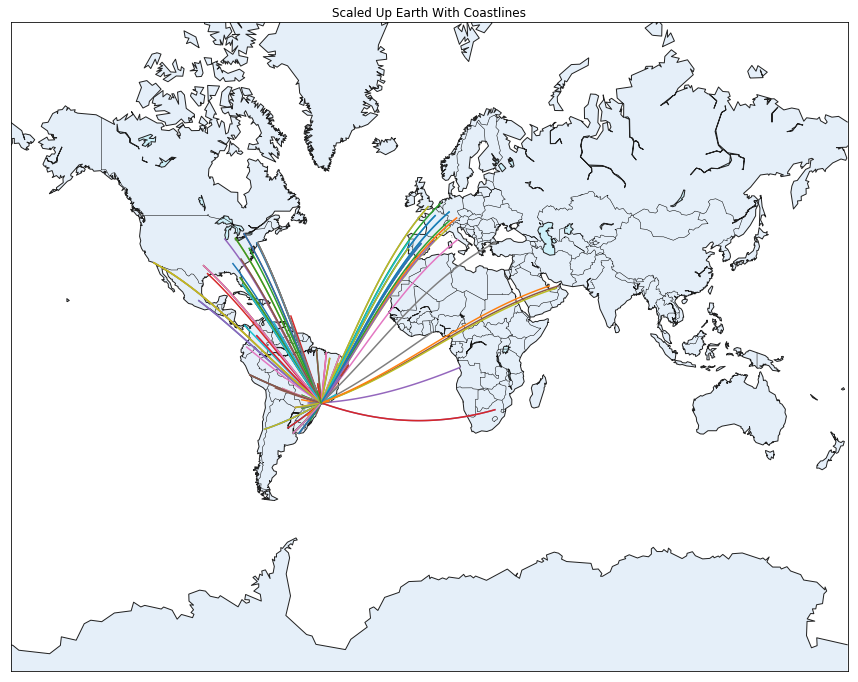

In [0]:
fig, ax = plt.subplots(figsize=(15,20))
m.drawcoastlines(color='#222222')
m.fillcontinents(color='#0066CC', lake_color='cyan', alpha=0.1)
m.drawcountries(color='black')

ax.set_title('Scaled Up Earth With Coastlines')

create_great_circle(gru)

plt.show()

### 1.11 - Guided customization




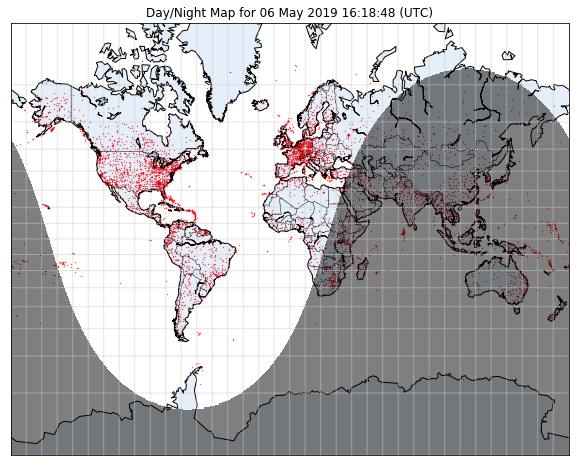

In [0]:
from datetime import datetime
import numpy as np
# Create a figure  
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Day/Night Map for %s (UTC)' % datetime.now().strftime("%d %b %Y %H:%M:%S"))
# Configure the basemap
m.scatter(x,y,s=0.1,color="red")
m.drawcountries(color='black')
m.fillcontinents(color='#0066CC', lake_color='white', alpha=0.1)
m.drawcoastlines()
# Draw lines of latitude (parallels) and longitude (meridians)
m.drawparallels(range(-90,91,10), color='#CCCCCC')
m.drawmeridians(range(-180,181,10), color='#CCCCCC')
# Day/Night shade (note the datetime is utc here)
m.nightshade(datetime.utcnow()) 
# Plot the figure
plt.show()